In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_2012 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2012.csv")
file_2013 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2013.csv")
file_2014 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2014.csv")
file_2015 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2015.csv")
file_2016 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2016.csv")
file_2017 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2017.csv")
file_2018 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2018.csv")

In [33]:
raw_2012_df = pd.read_csv(file_2012)
raw_2013_df = pd.read_csv(file_2013)
raw_2014_df = pd.read_csv(file_2014)
raw_2015_df = pd.read_csv(file_2015)
raw_2016_df = pd.read_csv(file_2016)
raw_2017_df = pd.read_csv(file_2017)
raw_2018_df = pd.read_csv(file_2018)

In [34]:
# Rename columns to match names prior to full append of data
# Only run once
# 2012
raw_2012_df = raw_2012_df.rename(columns = {"Forcible\nrape":"Rape"})

# 2013
raw_2013_df = raw_2013_df.fillna(0)
raw_2013_df['Rape\n(revised\ndefinition)1'] = raw_2013_df['Rape\n(revised\ndefinition)1'] +  raw_2013_df['Rape\n(legacy\ndefinition)2']
raw_2013_df = raw_2013_df.drop(['Rape\n(legacy\ndefinition)2'], axis=1)
raw_2013_df = raw_2013_df.rename(columns = {"Rape\n(revised\ndefinition)1":"Rape","Arson3": "Arson"})

# 2014
raw_2014_df = raw_2014_df.drop(['Rape\n(legacy\ndefinition)2'], axis=1)
raw_2014_df = raw_2014_df.rename(columns = {"Rape\n(revised\ndefinition)1":"Rape"})

# 2015
raw_2015_df.drop(['Rape\n(legacy\ndefinition)2'], axis=1, inplace=True)
raw_2015_df = raw_2015_df.rename(columns = {"Rape\n(revised\ndefinition)1": "Rape"})

# 2016
raw_2016_df.drop(['Rape\n(legacy\ndefinition2)'], axis=1, inplace=True)
raw_2016_df = raw_2016_df.rename(columns = {"Rape\n(revised\ndefinition1)": "Rape"})

# 2017
raw_2017_df = raw_2017_df.rename(columns = {"Rape1": "Rape", "Cities": "City"} )

# 2018
raw_2018_df = raw_2018_df.rename(columns = {"Rape1": "Rape", "State": "City"})

In [35]:
# Raw file prior to clean up
crime_df = raw_2012_df.append([raw_2013_df, raw_2014_df, raw_2015_df, raw_2016_df, raw_2017_df, raw_2018_df])
# crime_df = crime_df[(crime_df["City"] == "Houston") | (crime_df["City"] == "Pasadena") |(crime_df["City"] == "League City") | (crime_df["City"] == "Sugar Land") | (crime_df["City"] == "Conroe") | (crime_df["City"] == "Baytown") | (crime_df["City"] == "Missouri City") | (crime_df["City"] == "Galveston") | (crime_df["City"] == "Texas City") | (crime_df["City"] == "Friendswood")]
crime_df = crime_df.rename(columns = {"Violent\ncrime":"Violent Crime", "Murder and\nnonnegligent\nmanslaughter":"Murder", "Aggravated\nassault":"Aggravated Assault","Property\ncrime":"Property Crime","Larceny-\ntheft":"Larceny Theft","Motor\nvehicle\ntheft":"Motor/Vehicle Theft"})
crime_df = crime_df.dropna()

In [36]:
# Pull information for only cities of interest
crime_df = crime_df[(crime_df["City"] == "Houston") | (crime_df["City"] == "Pasadena") |(crime_df["City"] == "League City") | (crime_df["City"] == "Sugar Land") | (crime_df["City"] == "La Porte") | (crime_df["City"] == "Baytown") | (crime_df["City"] == "Missouri City") | (crime_df["City"] == "Galveston") | (crime_df["City"] == "Texas City") | (crime_df["City"] == "Friendswood")]
crime_df

,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor/Vehicle Theft,Arson
35,Baytown,2012.0,"74,420",247,5.0,15,97,130,"3,684",939,"2,438",307,23.0
194,Friendswood,2012.0,"36,965",15,0.0,4,4,7,353,66,274,13,0.0
198,Galveston,2012.0,"49,170",296,2.0,37,118,139,"2,469",517,"1,792",160,12.0
255,Houston,2012.0,"2,177,273","21,610",217.0,665,"9,385","11,343","107,678","26,630","67,978","13,070",754.0
323,La Porte,2012.0,"35,054",61,1.0,25,8,27,604,127,439,38,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,League City,2018.0,"105,351",97,3.0,34,18,42,"1,718",218,"1,407",93,3.0
367,Missouri City,2018.0,"75,863",149,2.0,23,46,78,969,133,767,69,0.0
415,Pasadena,2018.0,"154,000",711,5.0,93,195,418,"3,773",636,"2,758",379,23.0
535,Sugar Land,2018.0,"89,790",71,0.0,15,36,20,"1,289",158,"1,075",56,0.0


### Total Crime per Capita for Each City   

In [37]:
crime_df.dtypes

City                    object
Year                   float64
Population              object
Violent Crime           object
Murder                 float64
Rape                    object
Robbery                 object
Aggravated Assault      object
Property Crime          object
Burglary                object
Larceny Theft           object
Motor/Vehicle Theft     object
Arson                  float64
dtype: object

In [38]:
# Create a list of columns we want to change and iterate over the dataframe.
object_list = ['Population', 'Violent Crime', 'Rape', 'Robbery','Aggravated Assault','Property Crime','Burglary','Larceny Theft','Motor/Vehicle Theft']

for columns in object_list:
    try:
        crime_df[columns] = crime_df[columns].replace(',','',regex=True)
        
    except:
        print(f', removal failed for {columns}')
        
    try:
        crime_df[columns] = crime_df[columns].astype(float)
        
    except:
        print(f'Float conversion failed for {columns}')
        
crime_df['Year'] = crime_df['Year'].astype(int)

# Output file with float values
output_file = os.path.join("..","Resources","Crime_Merged.csv")
crime_df.to_csv(output_file, index=False)

crime_df

,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor/Vehicle Theft,Arson
35,Baytown,2012,74420.0,247.0,5.0,15.0,97.0,130.0,3684.0,939.0,2438.0,307.0,23.0
194,Friendswood,2012,36965.0,15.0,0.0,4.0,4.0,7.0,353.0,66.0,274.0,13.0,0.0
198,Galveston,2012,49170.0,296.0,2.0,37.0,118.0,139.0,2469.0,517.0,1792.0,160.0,12.0
255,Houston,2012,2177273.0,21610.0,217.0,665.0,9385.0,11343.0,107678.0,26630.0,67978.0,13070.0,754.0
323,La Porte,2012,35054.0,61.0,1.0,25.0,8.0,27.0,604.0,127.0,439.0,38.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,League City,2018,105351.0,97.0,3.0,34.0,18.0,42.0,1718.0,218.0,1407.0,93.0,3.0
367,Missouri City,2018,75863.0,149.0,2.0,23.0,46.0,78.0,969.0,133.0,767.0,69.0,0.0
415,Pasadena,2018,154000.0,711.0,5.0,93.0,195.0,418.0,3773.0,636.0,2758.0,379.0,23.0
535,Sugar Land,2018,89790.0,71.0,0.0,15.0,36.0,20.0,1289.0,158.0,1075.0,56.0,0.0


In [39]:
# Create new dataframe that will be utilized to graph. Unsure about error messages.
crime_graph_df = crime_df[['City','Year','Population','Violent Crime', 'Property Crime']].reset_index()
crime_graph_df["Total Crime"] = crime_graph_df['Violent Crime'] + crime_graph_df['Property Crime']


In [40]:
# Illustrate graphing data frame
crime_graph_df

,index,City,Year,Population,Violent Crime,Property Crime,Total Crime
0,35,Baytown,2012,74420.0,247.0,3684.0,3931.0
1,194,Friendswood,2012,36965.0,15.0,353.0,368.0
2,198,Galveston,2012,49170.0,296.0,2469.0,2765.0
3,255,Houston,2012,2177273.0,21610.0,107678.0,129288.0
4,323,La Porte,2012,35054.0,61.0,604.0,665.0
...,...,...,...,...,...,...,...
65,319,League City,2018,105351.0,97.0,1718.0,1815.0
66,367,Missouri City,2018,75863.0,149.0,969.0,1118.0
67,415,Pasadena,2018,154000.0,711.0,3773.0,4484.0
68,535,Sugar Land,2018,89790.0,71.0,1289.0,1360.0


In [41]:
# Add additional breakdown per capita for graph
crime_graph_df['Total Crime Per Capita [10,000]'] = (crime_graph_df['Total Crime'] / crime_graph_df['Population'])*10000
crime_graph_df['Violent Crime Per Capita [10,000]'] = (crime_graph_df['Violent Crime'] / crime_graph_df['Population'])*10000
crime_graph_df['Property Crime Per Capita [10,000]'] = (crime_graph_df['Property Crime'] / crime_graph_df['Population'])*10000

In [42]:
crime_graph_df['City'].unique()

array(['Baytown', 'Friendswood', 'Galveston', 'Houston', 'La Porte',
       'League City', 'Missouri City', 'Pasadena', 'Sugar Land',
       'Texas City'], dtype=object)

In [43]:
# Illustrate graphing data frame
crime_graph_df

,index,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]"
0,35,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218
1,194,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739
2,198,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448
3,255,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427
4,323,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586
...,...,...,...,...,...,...,...,...,...,...
65,319,League City,2018,105351.0,97.0,1718.0,1815.0,172.281231,9.207316,163.073915
66,367,Missouri City,2018,75863.0,149.0,969.0,1118.0,147.370919,19.640668,127.730251
67,415,Pasadena,2018,154000.0,711.0,3773.0,4484.0,291.168831,46.168831,245.000000
68,535,Sugar Land,2018,89790.0,71.0,1289.0,1360.0,151.464528,7.907339,143.557189


In [44]:
# Create a spaghetti plot for the data set
city_list = crime_graph_df['City'].unique()
year_list = crime_graph_df['Year'].unique()

In [45]:
city_list

array(['Baytown', 'Friendswood', 'Galveston', 'Houston', 'La Porte',
       'League City', 'Missouri City', 'Pasadena', 'Sugar Land',
       'Texas City'], dtype=object)

In [46]:
crime_graph_df['Total Crime Per Capita [10,000]'].loc[crime_graph_df['City'] == 'Baytown'].values

array([528.21822091, 534.26311577, 445.6218116 , 403.00732387,
       409.19921268, 386.68126825, 386.68126825])

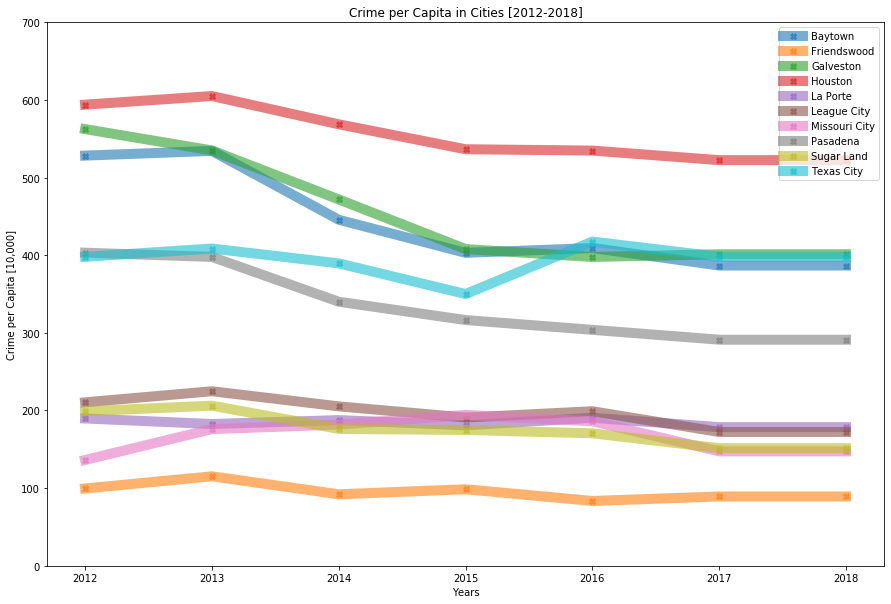

In [47]:
# Graphing parameters
plt.figure(figsize =(15,10))
plt.ylim(0,700)

# Graph line graph of crime per capita of cities in question 
for city in city_list:
    filter_city_df = crime_graph_df.loc[crime_graph_df['City'] == city]
    plt.plot(filter_city_df['Year'],filter_city_df['Total Crime Per Capita [10,000]'], label=city, alpha = .6, linewidth = 10, marker="X")

# Labels for map
plt.xlabel("Years")
plt.ylabel("Crime per Capita [10,000]")
plt.title("Crime per Capita in Cities [2012-2018]")
plt.legend(loc="best")

In [48]:
# Create Empty lists
total_lst = []
violent_lst = []
property_lst = []

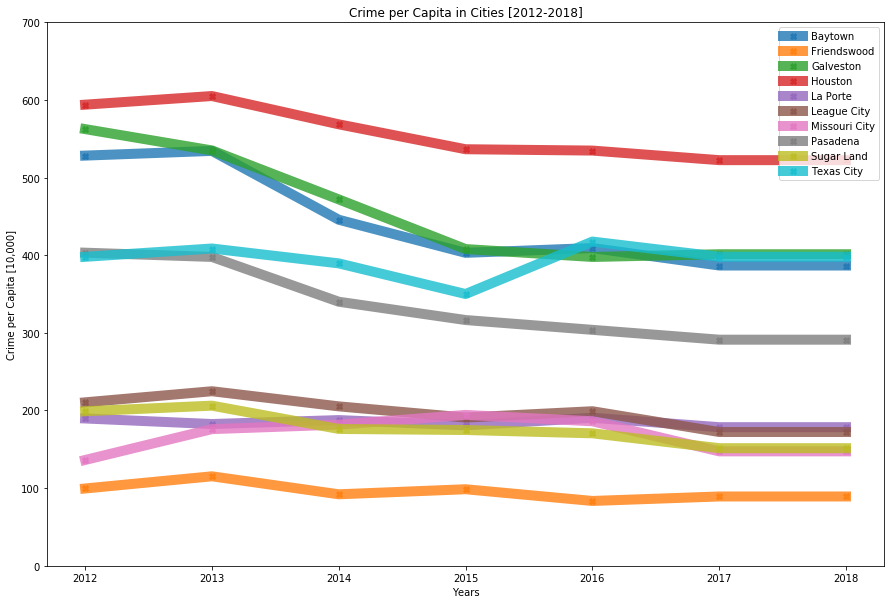

In [49]:
# Graphing parameters
plt.figure(figsize =(15,10))
plt.ylim(0,700)
# Graph line graph of crime per capita of cities in question
ax = plt.gca()
for city in city_list:
    filter_city_df = crime_graph_df.loc[crime_graph_df['City'] == city]
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(filter_city_df['Year'],filter_city_df['Total Crime Per Capita [10,000]'], label=city, color=color, alpha = .8, linewidth = 10, marker="X")
# Labels for map
plt.xlabel("Years")
plt.ylabel("Crime per Capita [10,000]")
plt.title("Crime per Capita in Cities [2012-2018]")
plt.legend(loc="best")

In [50]:
# Obtaining means for different types of crime and appending to a list 
for city in city_list:
    filter_city_df = crime_graph_df.loc[crime_graph_df['City'] == city]
    total_lst.append(filter_city_df['Total Crime Per Capita [10,000]'].mean())
    violent_lst.append(filter_city_df['Violent Crime Per Capita [10,000]'].mean())
    property_lst.append(filter_city_df['Property Crime Per Capita [10,000]'].mean())

In [51]:
len(total_lst)

10

In [53]:
# Output data for geospacing, this dataframe looks at 2012-2018 only
geo_crime_df = pd.DataFrame({'City': city_list, 
                             'Total Crime Per Capita [10,000]': total_lst, 
                             'Violent Crime Per Capita [10,000]': violent_lst,
                             'Property Crime Per Capita [10,000]': property_lst})

output_geo = os.path.join("..","Resources","geo_crime_df.csv")
geo_crime_df.to_csv(output_geo, index=False)

Text(0.5, 1.0, 'Crime per Capita in Cities [2012-2018]')

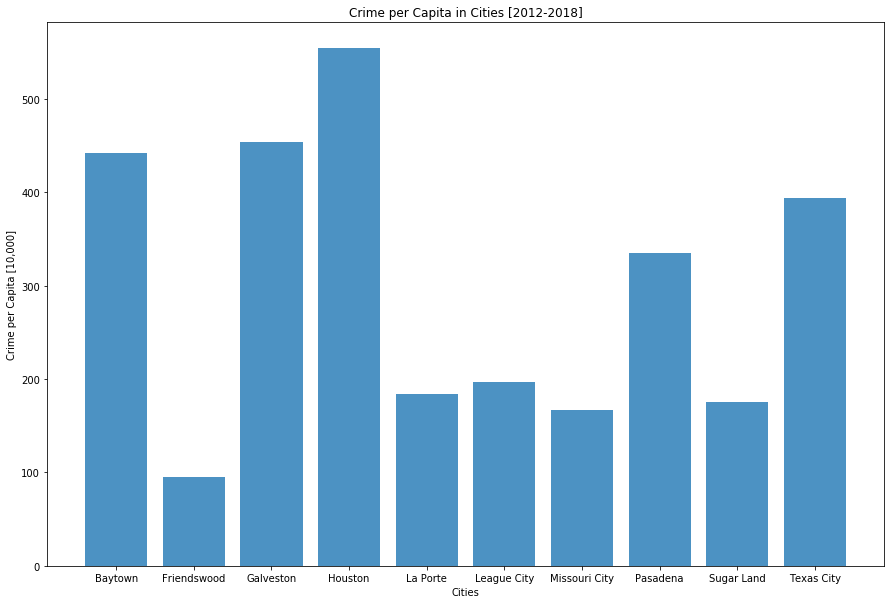

In [136]:
plt.figure(figsize =(15,10))
plt.bar(x=city_list, height=total_lst, alpha=.8, align='center')
plt.xlabel("Cities")
plt.ylabel("Crime per Capita [10,000]")
plt.title("Crime per Capita in Cities [2012-2018]")
# plt.legend(loc="best")

Text(0, 0.5, 'Crime per Capita [10,000]')

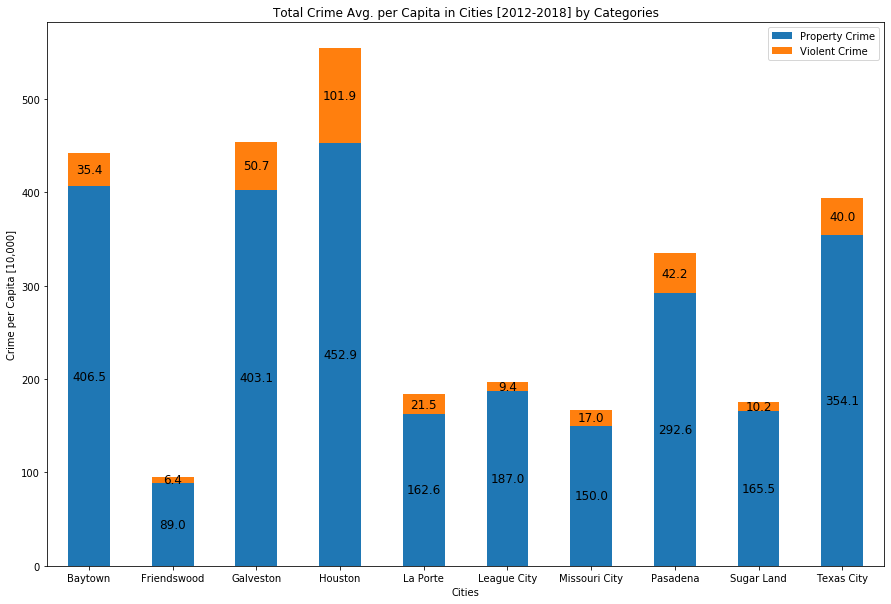

In [137]:
# 'Total Crime': total_lst,
plotdata = pd.DataFrame({'Property Crime': property_lst, 'Violent Crime': violent_lst}, index = city_list)

ax = plotdata.plot(kind='bar', stacked=True, figsize=(15,10), rot=0)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can used as the label
    label_text = f'{round(height,1)}'  # f'{height:.2f}' if you have decimal values as labels
    
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

plt.title("Total Crime Avg. per Capita in Cities [2012-2018] by Categories")
plt.xlabel("Cities")
plt.ylabel("Crime per Capita [10,000]")